# Partie I : Prédiction multivariée de données météo (Delhi)

  Dans cette partie, l'objectif est de prédire, sur les jours suivants, plusieurs variables climatiques en même temps des données météo (Delhi)

### Impotation des bibliothèques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Dropout, Bidirectional

In [2]:
import os
path = os.getcwd()
print(path)

/content


### Chargement des données avec Pandas

In [3]:
from google.colab import files
uploaded = files.upload()

Saving DailyDelhiClimateTrain.csv to DailyDelhiClimateTrain.csv


In [4]:
import io
df = pd.read_csv(io.StringIO(uploaded['DailyDelhiClimateTrain.csv'].decode('utf-8')), parse_dates=['date'], index_col='date')

###On affiche les 5 premières lignes du dataframe
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [5]:
###On affiche les 5 dernières lignes du dataframe
df.tail()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762
2016-12-31,15.052632,87.000000,7.325000,1016.100000
2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [6]:
df.shape

(1462, 4)

In [7]:
list(df)

['meantemp', 'humidity', 'wind_speed', 'meanpressure']

In [8]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='date', length=1462, freq=None)

1. Séparez les données climatiques quotidiennes de New Delhi (contenant les 4 colonnes meantemp, humidity, wind_speed et meanpressure) en données d'entrainement (environ 70%) et données de test (environ 30%).

In [9]:
###Voir s'il y a des valeurs manquantes
df.isnull().sum()

,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0


In [10]:
df.isna().sum()

,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0


In [11]:
###On prend en données d'entrainement (environ 70%) et données de test (environ 30%)
train_size = int(len(df) * 0.7)
train_size

1023

In [12]:
###Séparation des données d'entrainement (environ 70%) et données de test (environ 30%)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [13]:
train_data.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [14]:
test_data.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2015-10-21,26.500,62.125,2.0875,1011.875
2015-10-22,24.750,56.000,4.4000,1012.250
2015-10-23,24.000,51.625,4.8625,1011.875
2015-10-24,24.875,53.250,1.4000,1011.625
2015-10-25,26.375,47.125,5.5750,1012.750


In [15]:
train_data.shape

(1023, 4)

In [16]:
test_data.shape

(439, 4)

In [17]:
###On peut normaliser nos données (mise à l'échelle)
scaler_object = MinMaxScaler()
scaler = scaler_object.fit(train_data)

train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [18]:
print(train_scaled[:8])
print('\n')
print(test_scaled[:8])

[[0.12227074 0.84037162 0.         0.76811594]
 [0.04279476 0.92905405 0.07058266 0.83557312]
 [0.0356623  0.86993243 0.10974262 0.8629776 ]
 [0.08151383 0.68468468 0.02921206 0.81554677]
 [0.         0.86796171 0.08763619 0.7944664 ]
 [0.03056769 0.82027027 0.03505448 0.84189723]
 [0.03056769 0.77060811 0.14921838 0.90513834]
 [0.08733624 0.59459459 0.16918184 0.86448334]]


[[0.62663755 0.57580236 0.04944339 0.64822134]
 [0.5731441  0.50337838 0.10421601 0.66007905]
 [0.55021834 0.45164696 0.11517054 0.64822134]
 [0.57696507 0.47086149 0.03315964 0.64031621]
 [0.62281659 0.3984375  0.13204642 0.67588933]
 [0.59989083 0.45755912 0.13204642 0.743083  ]
 [0.5731441  0.48268581 0.08230696 0.71146245]
 [0.45469432 0.51815878 0.18652297 0.77470356]]


2. Créez une fonction create_Xseq_and_y pour qu'elle donne en sortie des séquences d'entrée (caractéristiques “X”) et les sorties à prédire correspondantes (étiquettes y) permettant d'utiliser les données climatiques journalières (meantemp, humidity, wind_speed, meanpressure) des 20 jours précédents pour prédire celles du 21ème jour. Appliquez la fonction à vos données d’entrainement et de test.

In [19]:
###Création de la fonction create_Xseq_and_y
def create_Xseq_and_y(X, look_back: int = 1):
  Xs, ys = [], []
  for i in range(len(X) - look_back):
    v = X[i:i + look_back]
    Xs.append(v)
    ys.append(X[i + look_back])

  return np.array(Xs), np.array(ys)

In [20]:
###Appliquons la fonction à nos données d'entrainement et de test en se basant sur les 20 jours précédents pour prédire celles du 21ème jour.
X_train, y_train = create_Xseq_and_y(train_scaled, 20)
X_test, y_test = create_Xseq_and_y(test_scaled, 20)

In [21]:
print(f'X_train.shape : {X_train.shape}')
print(f'y_train.shape : {y_train.shape}')
print(f'X_test.shape : {X_test.shape}')
print(f'y_test.shape : {y_test.shape}')

X_train.shape : (1003, 20, 4)
y_train.shape : (1003, 4)
X_test.shape : (419, 20, 4)
y_test.shape : (419, 4)


3. et 4. Mise en place d'une architecture de réseau de neurones pour le modèle choisi (architecture à améliorer éventuellement).<br>
Ensuite, Entrainement de ce modèle l'aide des données d'entrainement précédemment préparées et évaluez la qualité de l'entrainement.

    Dans notre cas, on va faire une comparaison entre ces modèles afin de faire un choix.

In [22]:
###On définit une fonction pour la création de chaque modèle

from typing import Literal

###Créer un modèle GRU
def create_gru(units, activation: Literal['tanh', 'relu', 'sigmoid'] = 'tanh', optimizer: Literal['adam', 'sgd'] = 'adam', loss: Literal['mse', 'mae', 'mape'] = 'mse'):
  model = Sequential()
  model.add(GRU(units=units, activation=activation, return_sequences=True, input_shape=[X_train.shape[1], X_train.shape[2]]))

  ###Désactivation aléatoire de 20% des neurones pour éviter l'overfitting
  model.add(Dropout(0.2))

  model.add(GRU(units=units))
  model.add(Dropout(0.2))

  ###Pour la prédiction de 4 éléments
  model.add(Dense(4))

  ###Compiler le modèle
  model.compile(optimizer=optimizer, loss=loss)
  model.summary()

  return model

###Créer un modèle LSTM
def create_lstm(units, activation: Literal['tanh', 'relu', 'sigmoid'] = 'tanh', optimizer: Literal['adam', 'sgd'] = 'adam', loss: Literal['mse', 'mae', 'mape'] = 'mse'):
  model = Sequential()
  model.add(LSTM(units=units, activation=activation, return_sequences=True, input_shape=[X_train.shape[1], X_train.shape[2]]))
  model.add(Dropout(0.2))
  model.add(LSTM(units=units))
  model.add(Dropout(0.2))
  model.add(Dense(4))

  ###Compiler le modèle
  model.compile(optimizer=optimizer, loss=loss)
  model.summary()

  return model

###Créer un modèle BiLSTM
def create_bilstm(units, activation: Literal['tanh', 'relu', 'sigmoid'] = 'tanh', optimizer: Literal['adam', 'sgd'] = 'adam', loss: Literal['mse', 'mae', 'mape'] = 'mse'):
  model = Sequential()
  model.add(Bidirectional(LSTM(units=units, activation=activation, return_sequences=True), input_shape=[X_train.shape[1], X_train.shape[2]]))
  model.add(Dropout(0.2))
  model.add(Bidirectional(LSTM(units=units)))
  model.add(Dropout(0.2))
  model.add(Dense(4))

  ###Compiler le modèle
  model.compile(optimizer=optimizer, loss=loss)
  model.summary()

  return model

In [23]:
model_gru = create_gru(64)
model_lstm = create_lstm(64)
model_bilstm = create_bilstm(64)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 20, 64)              │          13,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,660 (151.02 KB)

 Trainable params: 38,660 (151.02 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 20, 64)              │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,948 (199.02 KB)

 Trainable params: 50,948 (199.02 KB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 20, 128)             │          35,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 20, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,660 (526.02 KB)

 Trainable params: 134,660 (526.02 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
###Fit the model
def fit_model(model, useEarlyStopping: bool = True, patience: int = 20, epochs: int = 200, batch_size: int = 20, validation_split: float = 0.2):
  early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
  history = model.fit(X_train, y_train, epochs=epochs, validation_split=validation_split, batch_size=batch_size, shuffle=False, callbacks= [early_stop] if useEarlyStopping else None)

  return history

###Plot train loss and validation loss
def plot_loss(history, model_name: str):
  plt.figure(figsize=(10, 6))
  plt.plot(history.history['loss'], label='Train loss')
  plt.plot(history.history['val_loss'], label='Validation loss')
  plt.title(f'{model_name} : Model Train vs Validation loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(loc="upper right")
  plt.show()

In [25]:
history_gru_with_earlyStopping = fit_model(model_gru)
history_lstm_with_earlyStopping = fit_model(model_lstm)
history_bilstm_with_earlyStopping = fit_model(model_bilstm)

Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.1401 - val_loss: 0.0175
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0211 - val_loss: 0.0113
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0167 - val_loss: 0.0112
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0162 - val_loss: 0.0116
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0157 - val_loss: 0.0141
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0144 - val_loss: 0.0122
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0146 - val_loss: 0.0170
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0149 - val_loss: 0.0123
Epoch 9/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0140 - val_loss: 0.0124
Epoch 10/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0126 - val_loss: 0.0108
Epoch 11/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0123 - val_loss: 0.0102
Epoch 12/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step

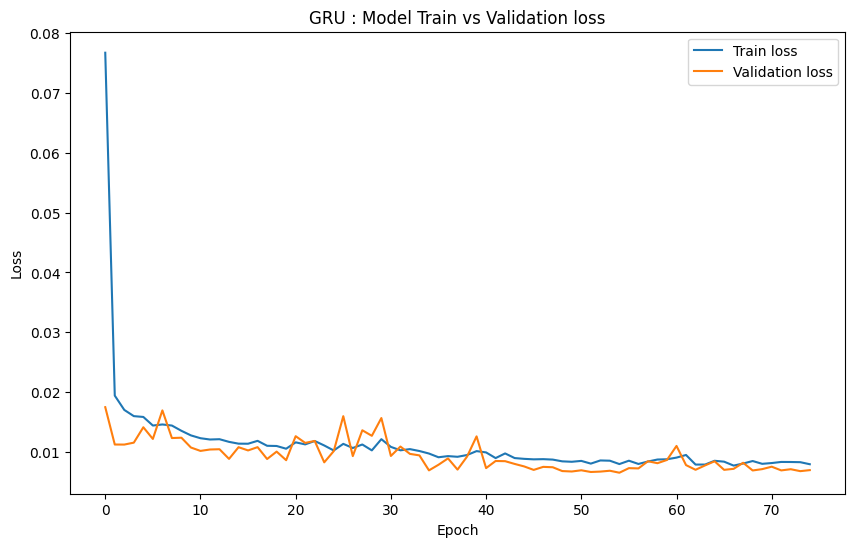

In [26]:
plot_loss(history_gru_with_earlyStopping, 'GRU')

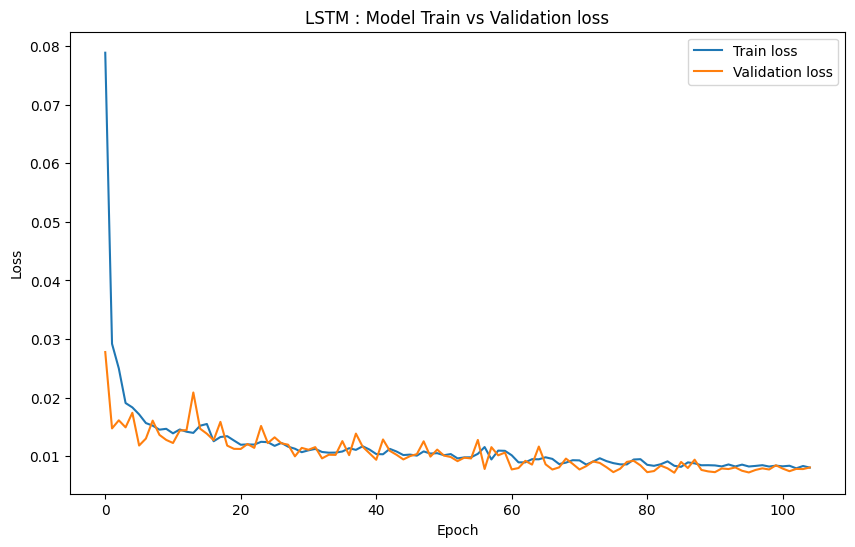

In [27]:
plot_loss(history_lstm_with_earlyStopping, 'LSTM')

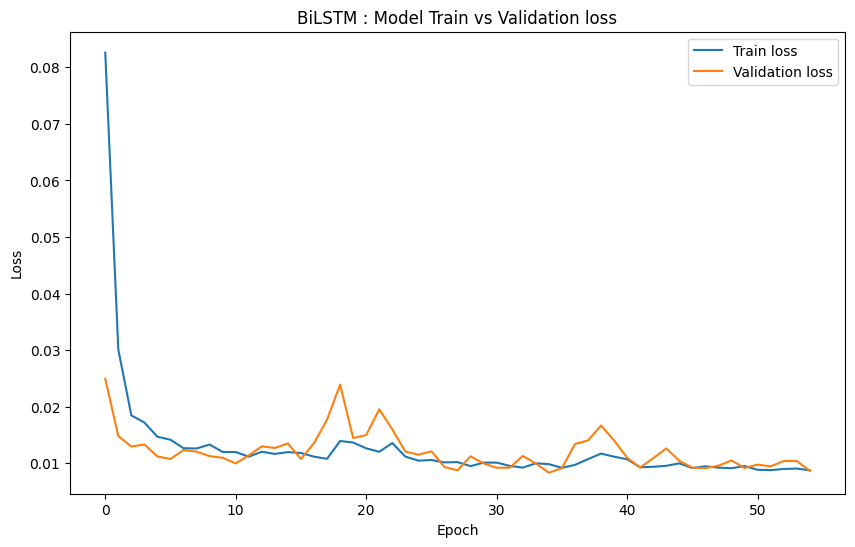

In [28]:
plot_loss(history_bilstm_with_earlyStopping, 'BiLSTM')

On constate que les modèles LSTM et GRU s'en sortent mieux que le BiLSTM, mais toutefois avec une epoch de 70 à 120 max.
On va refaire sans le EarlyStopping.

In [29]:
history_gru_without_earlyStopping = fit_model(model_gru, useEarlyStopping=False)
history_lstm_without_earlyStopping = fit_model(model_lstm, useEarlyStopping=False)
history_bilstm_without_earlyStopping = fit_model(model_bilstm, useEarlyStopping=False)

Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0082 - val_loss: 0.0066
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0083 - val_loss: 0.0078
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0080 - val_loss: 0.0071
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0082 - val_loss: 0.0068
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0079 - val_loss: 0.0073
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0077 - val_loss: 0.0070
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0083 - val_loss: 0.0068
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0079 - val_loss: 0.0070
Epoch 9/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0082 - val_loss: 0.0073
Epoch 10/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0080 - val_loss: 0.0077
Epoch 11/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0084 - val_loss: 0.0094
Epoch 12/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step

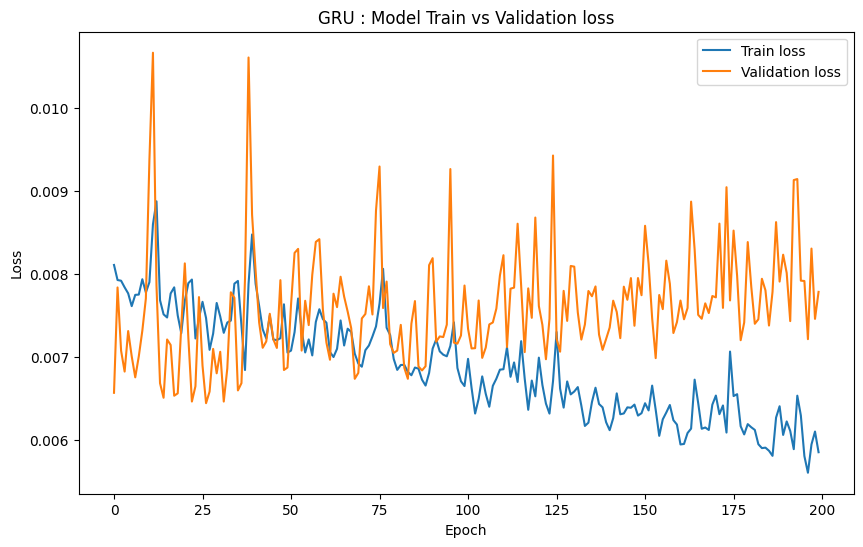

In [30]:
plot_loss(history_gru_without_earlyStopping, 'GRU')

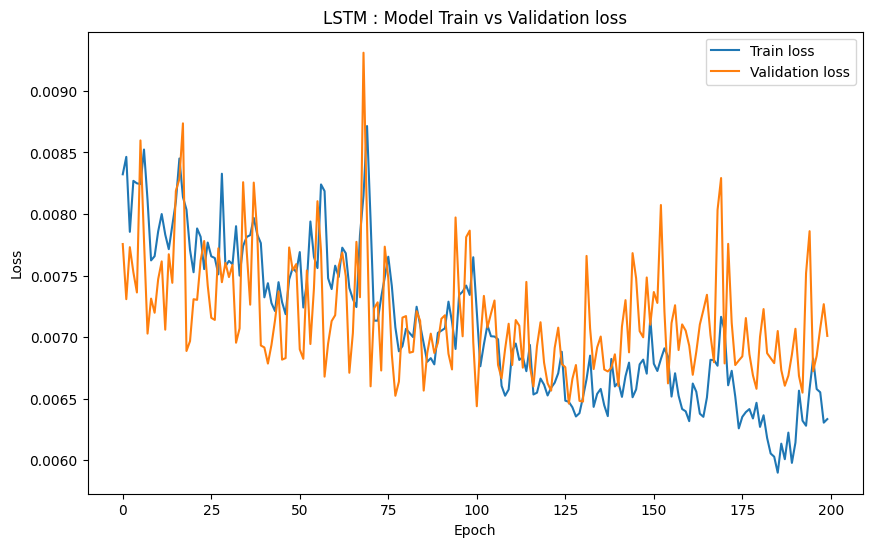

In [31]:
plot_loss(history_lstm_without_earlyStopping, 'LSTM')

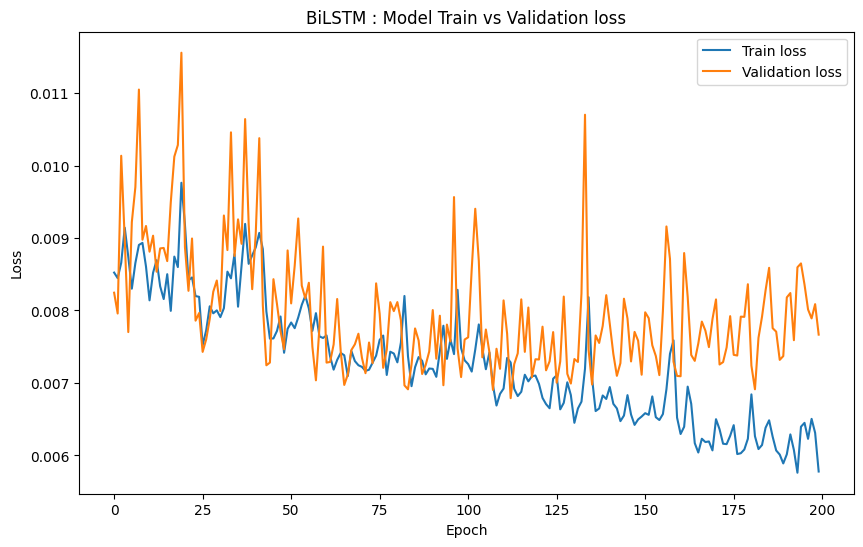

In [32]:
plot_loss(history_bilstm_without_earlyStopping, 'BiLSTM')

Sans le EarlyStopping, on constate que c'est pas bon dans les 3 cas. Peut-être avec plus d'epoch ça pourrait aller.<br>
Du coup notre choix portera sur le LSTM avec le EarlyStopping qui est mieux par rapport aux autres.

5. Prédisez les données de test avec le modèle entrainez

In [52]:
###On définit une fonction qui permet de faire la prédiction
def prediction(model):
  prediction = model.predict(X_test)
  prediction = scaler.inverse_transform(prediction)
  return prediction

In [53]:
prediction_lstm = prediction(model_lstm)
prediction_lstm

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


array([[  20.045506 ,   72.348175 ,    2.086251 , 1015.2487   ],
       [  20.792118 ,   70.176956 ,    2.4906554, 1014.34186  ],
       [  20.581617 ,   61.316986 ,    4.524806 , 1015.77673  ],
       ...,
       [  15.037657 ,   81.50399  ,    3.8298335, 1017.5351   ],
       [  14.055898 ,   79.5085   ,    4.879031 , 1017.9602   ],
       [  14.545397 ,   78.94611  ,    5.088486 , 1016.1686   ]],
      dtype=float32)

6. Calculez l'erreur de prédiction et commentez

In [35]:
###Transformer les données en données d'origine
y_test_inv_trans_back = scaler.inverse_transform(y_test)
y_train_inv_trans_back = scaler.inverse_transform(y_train)

In [36]:
def evaluate_prediction(predictions, actual, model_name):
  errors = predictions - actual
  mse = (errors**2).mean()

  print(f'Model: {model_name}')
  print(f'MSE: {mse}')

In [37]:
evaluate_prediction(prediction_lstm, y_test_inv_trans_back, 'LSTM')

Model: LSTM
MSE: 28285.658954855753


Le MSE de notre modèle étant très élévé, donc il présente beaucoup d'erreur de prédiction (Plus la MSE est élevée, plus l'erreur est importante.)

7. Proposez un graphique pour chaque variable climatique (meantemp, humidity, wind_speed et meanpressure) permettant de représenter en même temps et dans différentes couleurs : ses vraies données d'entrainement, ses vraies données de test et les prédictions du modèle
RNN. Commentez !

In [38]:
###Plot test data vs prediction
def plot_training_vs_test_vs_predict(y_train_data, y_test_data, prediction, model_name):
    features = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
    num_features = len(features)

    plt.figure(figsize=(10, 5 * num_features))

    range_training = np.arange(y_train_data.shape[0])
    range_future = np.arange(y_train_data.shape[0], y_train_data.shape[0] + y_test_data.shape[0])

    for i in range(num_features):
        plt.subplot(num_features, 1, i + 1)
        plt.plot(range_training, np.array(y_train_data[:, i]), label=f'{model_name} - Données d\'entraînement', color='black')
        plt.plot(range_future, np.array(y_test_data[:, i]), label=f'{model_name} - Données de test', color='blue')
        plt.plot(range_future, np.array(prediction[:, i]), label=f'{model_name} - Prédiction', color='green')
        plt.legend(loc='upper left')
        plt.xlabel('Time (day)')
        plt.ylabel(features[i])

    plt.show()

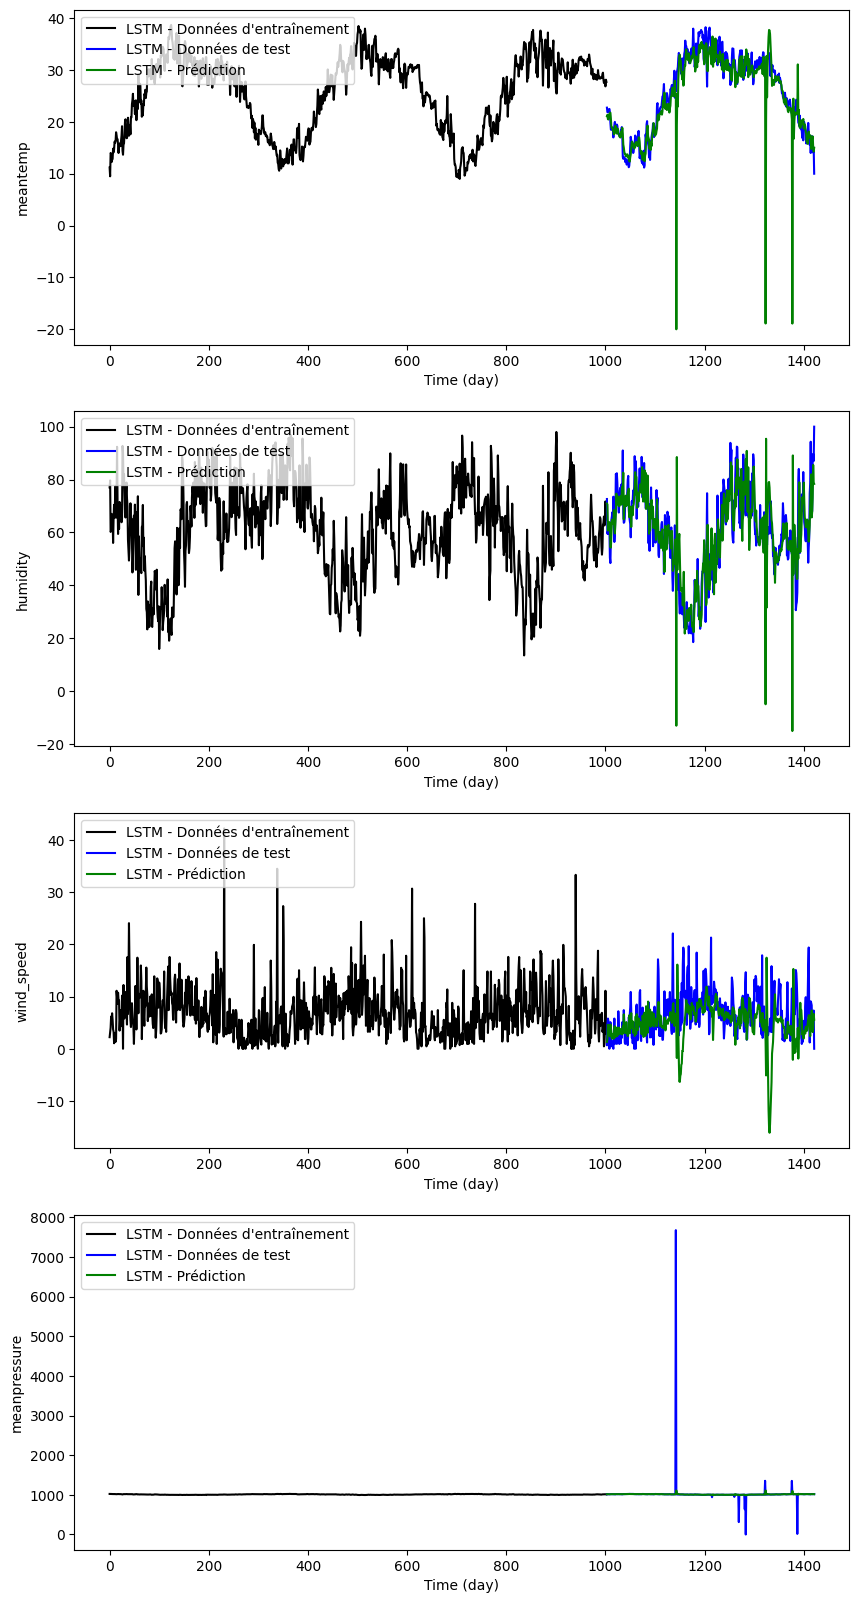

In [39]:
plot_training_vs_test_vs_predict(y_train_inv_trans_back, y_test_inv_trans_back, prediction_lstm, 'LSTM')

On remarque que les prédictions suivent de près les données de test mais il y'a des écarts au niveau des pics et creux. Sinon on peut dire que la prédiction s'est un peu bien passée.

8. Ré-entrainez votre modèle sur l’ensemble des données climatiques de New Delhi (du 1er janvier 2013 au 1er janvier 2017 avec l’ensemble des 4 variables climatiques) et prédisez les variables climatiques du 02 janvier 2017 au 12 janvier 2017. Représentez graphiquement ces résultats de prédictions et commentez.

In [40]:
model_lstm = create_lstm(128)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 20, 128)             │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 20, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 200,196 (782.02 KB)

 Trainable params: 200,196 (782.02 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
history_lstm_with_earlyStopping = fit_model(model_lstm)

Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 0.1113 - val_loss: 0.0362
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0266 - val_loss: 0.0595
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0308 - val_loss: 0.0555
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0264 - val_loss: 0.0245
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0212 - val_loss: 0.0312
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0234 - val_loss: 0.0179
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0155 - val_loss: 0.0140
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0146 - val_loss: 0.0148
Epoch 9/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0130 - val_loss: 0.0140
Epoch 10/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0142 - val_loss: 0.0144
Epoch 11/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0140 - val_loss: 0.0116
Epoch 12/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step

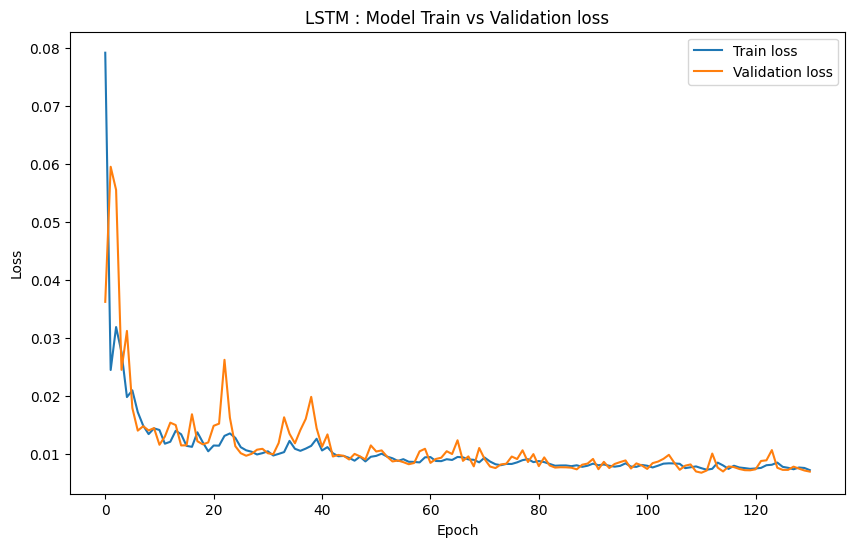

In [42]:
plot_loss(history_lstm_with_earlyStopping, 'LSTM')

In [54]:
new_df = df.copy()
new_df_scaled = scaler.transform(new_df)

def predict_next_days(model, look_back: int = 20, future_days: int = 11):
    look_back_days = new_df_scaled[-look_back:]
    look_back_days = np.reshape(look_back_days, (1, look_back, new_df_scaled.shape[1]))
    future_predictions = []

    for _ in range(future_days):
        prediction = model.predict(look_back_days)
        future_predictions.append(prediction[0])

        look_back_days = np.concatenate((look_back_days[:, 1:, :], prediction.reshape(1, 1, new_df_scaled.shape[1])), axis=1)

    return scaler.inverse_transform(np.array(future_predictions))

In [56]:
future_days = 11
predict_next_days_prediction = predict_next_days(model_lstm, future_days=future_days)
predict_next_days_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[  12.160673 ,   90.13967  ,    2.8154006, 1018.0239   ],
       [  12.217722 ,   79.03469  ,    5.2714853, 1018.882    ],
       [  12.254718 ,   77.87839  ,    5.3286266, 1019.53094  ],
       [  11.919384 ,   79.01917  ,    4.893412 , 1019.8497   ],
       [  11.64402  ,   79.06315  ,    4.881374 , 1020.26636  ],
       [  11.45751  ,   78.633125 ,    4.943237 , 1020.5308   ],
       [  11.288927 ,   78.333    ,    4.9272037, 1020.64856  ],
       [  11.103457 ,   78.21195  ,    4.868519 , 1020.74207  ],
       [  10.891778 ,   78.25317  ,    4.7859197, 1020.8365   ],
       [  10.655489 ,   78.41881  ,    4.6990013, 1020.9053   ],
       [  10.451883 ,   78.58067  ,    4.643675 , 1020.9799   ]],
      dtype=float32)

In [57]:
new_df_inv_trans_back = scaler.inverse_transform(new_df_scaled)
new_df_inv_trans_back

array([[  10.        ,   84.5       ,    0.        , 1015.66666667],
       [   7.4       ,   92.        ,    2.98      , 1017.8       ],
       [   7.16666667,   87.        ,    4.63333333, 1018.66666667],
       ...,
       [  14.0952381 ,   89.66666667,    6.26666667, 1017.9047619 ],
       [  15.05263158,   87.        ,    7.325     , 1016.1       ],
       [  10.        ,  100.        ,    0.        , 1016.        ]])

In [58]:
futures_dates = pd.date_range(new_df.index[-1] + pd.Timedelta(days=1), periods=future_days)
futures_dates

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-07', '2017-01-08', '2017-01-09',
               '2017-01-10', '2017-01-11', '2017-01-12'],
              dtype='datetime64[ns]', freq='D')

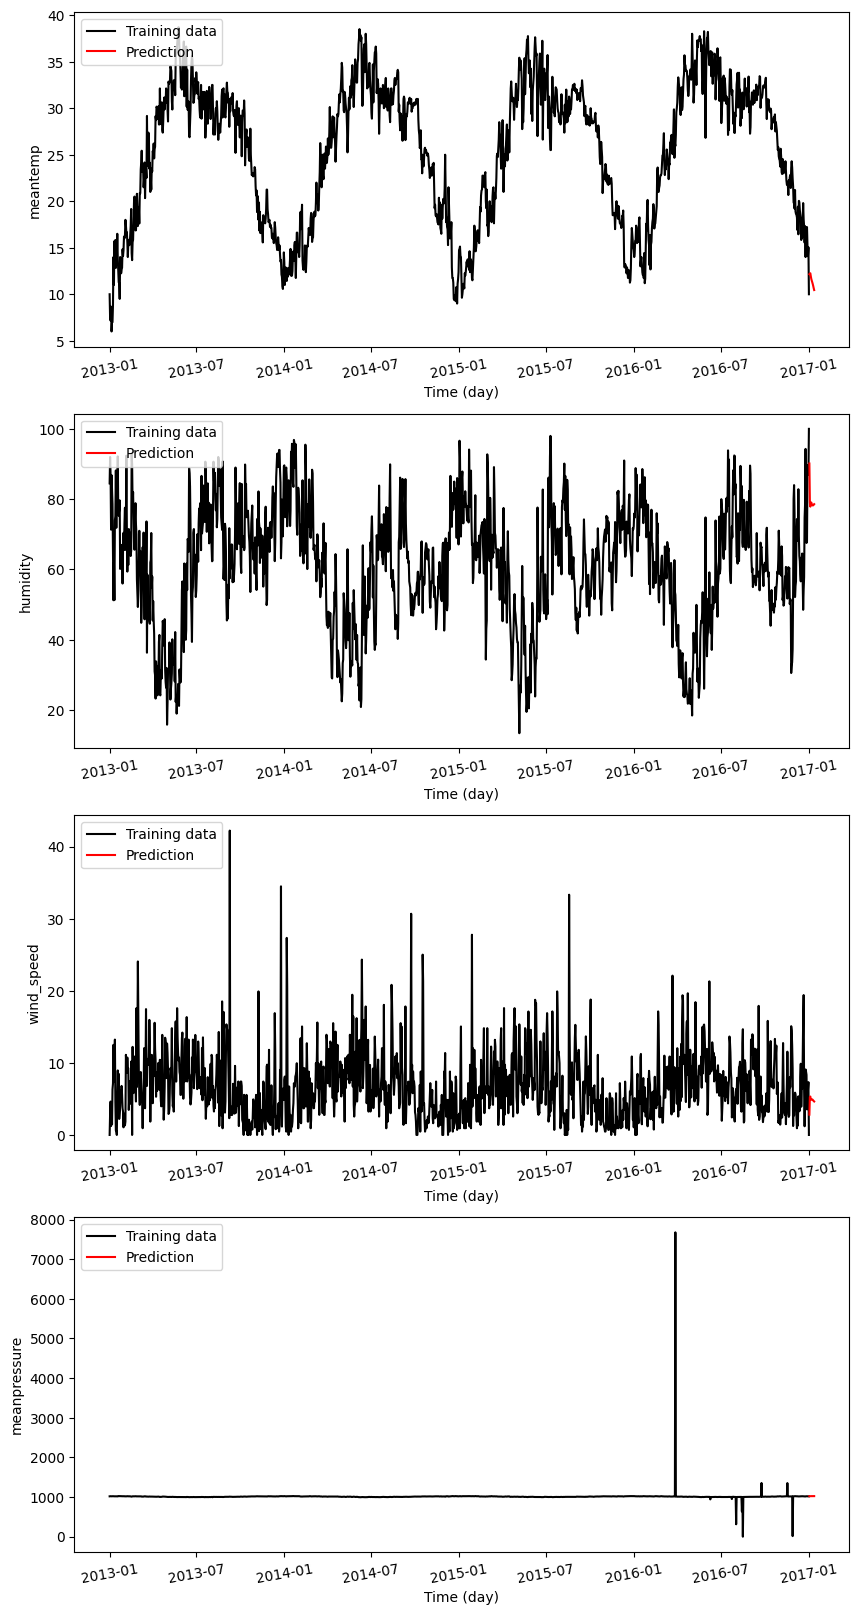

In [60]:
import matplotlib.dates as mdates
fmt = mdates.DateFormatter('%Y-%m-%d')

features = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
num_features = len(features)

plt.figure(figsize=(10, 5 * num_features))

for i in range(num_features):
    plt.subplot(num_features, 1, i + 1)
    plt.plot(new_df.index, new_df_inv_trans_back[:, i], label=f'Training data', color='black')
    plt.plot(futures_dates, predict_next_days_prediction[:, i], label=f'Prediction', color='red')
    # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    # plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
    plt.xticks(rotation=10)
    plt.legend(loc='upper left')
    plt.xlabel('Time (day)')
    plt.ylabel(features[i])


plt.show()

Il est difficile d'évaluer la précision de la prédiction, vu c'est fait sur une periode très courte. Mais toutefois, on peut dire qu'elle semble bien predire les parties saisonnales et aussi sur la dernière partie (graphe de meanpressure)

# Partie II : Génération de texte avec des modèles “RNN”
Dans cette partie, l'objectif est d'entrainer et de valider un modèle de type RNN pour la génération de texte tout en identifiant d'éventuelles limites  (étudiées théoriquement pendant le cours ou non).

In [83]:
from tensorflow.keras.preprocessing.text import Tokenizer
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from torch.utils.data import random_split
from collections import Counter

1. Afin de procéder à notre génération de texte nous allons tout d'abord trouver un texte orignal sur l'Afrique ecri par nous-mêmes et qui servira de données d'entrainement de notre modèle de génération de texte

In [84]:
corpus = """
Quand la haine devient plus forte que l’inspiration
On trébuche sur le texte et on en a marre des ponctuations
Et il y a cette petite voix dans ma tête qui me dit : arrête !
Quand même les mots se vexent si c’est pour parler de ces concepts
Et que l’humain lui-même se déshumanise
Face aux ambitions politiques et aux aspects capitalistes

J’ai deux, trois mots pour ce monde déchiré
Qui, obsédé par le pouvoir, en oublie sa dignité
J’attends toujours ce changement dans ce faux discours
Qui, avant d’être exécuté, avait déjà fait demi-tour
Y’a des personnes qui tendent la main, y’a des pays qui le font aussi
Je vais pas rentrer dans les détails, l’histoire est bien pourrie
Depuis toujours, de l’injustice à répétition
Moi, j’ai vu des enfants mourir de malnutrition
L’Afrique a besoin de fonds pour gérer le matériel
Et se passer des dons, sa dépendance actuelle
Quel gâchis d’avoir une terre fertile mais pas d’argent pour acheter les graines
Et à force, on nous apprend à cultiver de la haine
Alors égalisons le monde à la façon Robin des Bois
Je volerai des mots aux esclaves pour les transmettre aux rois

Mais en attendant, je me bats contre le monde pour ce complexe
Qu’on veut me faire porter, forcer le racisme avec
Que je devrais avoir honte de mes origines, enfant africain, ça fait de la peine
De vos cheveux, vos visages à votre couleur
D’ébène
Mais j’ai plus que des défauts si vous me regardez bien
Vous aimeriez ma peau et, au fait, je n’ai honte de rien
Alors arrêtez de créer de la différence entre les hommes
On a tous en commun l’histoire d’Adam, d’Ève et la pomme
Ce sont nos égos qui fortifient l’injustice
Si on la laisse s’accroître, que dirions-nous à nos fils ?
Qu’ils devront être guerriers dans ce monde que nous-mêmes on a détruit
Qu’on n’a pas respecté ces mots que nous-mêmes on a écrits
Comment oublier ces guerres et repartir à zéro ?
Comment ferions-nous pour sourire sans que ça sonne faux ?
Faudrait qu’on apprenne à accepter nos différences
Qu’une couleur, une croyance n’est pas une référence
Qu’on réalise qu’il y a des choses plus importantes que le pouvoir
Et qu’on n’a même pas besoin de lunettes pour y voir

"""

Nous allons maintenant passer au prétraitement de notre corpus en faisant la tokenisation puis en calculant la fréquence des mots, ensuite on va trier les mots dans l'ordre de fréquence plus elevé. Ceci nous aidera à savoir quels sont les mots les plus frequents et c'est dans cet ordre qu'on va vectoriser nos mots a l'aide de leurs indexes dans la liste créée

In [85]:
#### On va tokeniser notre corpus
words = corpus.split()

In [86]:
#### On va compter la frequence de chaque mot pour en voir les mots les plus repetés
word_counts = Counter(words)

In [87]:
#### On va refaire notre vocabulaire en triant pas ordre de frequence des mots
#### Création du vocabulaire trié
vocab = sorted(word_counts, key=word_counts.get, reverse=True)

#### Convertir en dictionnaire {mot: index}
vocab = {word: idx for idx, word in enumerate(vocab)}

#### Ajouter un token "<unk>" pour les mots inconnus
if "<unk>" not in vocab:
    vocab["<unk>"] = len(vocab)  # Ajoute "<unk>" avec un nouvel index

#### Créer l'index inverse {index: mot}
index_to_word = {idx: word for word, idx in vocab.items()}

In [88]:
#### Associer un index à chaque mot
word_to_index = {word: i for i, word in enumerate(vocab)}
index_to_word = {i: word for word, i in word_to_index.items()}

In [89]:
#### Convertir le texte en liste d'indices
indexed_text = [word_to_index[word] for word in words]

In [90]:
#### Creation de notre dataset avec une classe qui prend en heritage notre indexed_text qui contient nos mots indexé et trié dans un ordre et on calcule la longueur
#### de la liste puis on retourne un tensor avec nos x et le y a la fin
import torch.nn.functional as F

class TextDataset(Dataset):
    def __init__(self, indexed_text, sequence_length):
        self.indexed_text = indexed_text
        self.sequence_length = sequence_length

    def __len__(self):
        return max(0, len(self.indexed_text) - self.sequence_length)

    def __getitem__(self, index):
        X = torch.tensor(self.indexed_text[index:index + self.sequence_length])
        y = torch.tensor(self.indexed_text[index + 1: index + self.sequence_length + 1])

        # Appliquer le padding si la séquence est plus courte que `sequence_length`
        if len(X) < self.sequence_length:
            padding_length = self.sequence_length - len(X)
            X = F.pad(X, (0, padding_length), value=0)
            y = F.pad(y, (0, padding_length), value=0)

        return X, y

On va maintenant définir la longueur de nos séquences et définir notre dataset.
Pour le dataset on va diviser nos données en données d'entraînement, de test et de validation afin de pouvoir évaluer la performance de nos modèles.

In [91]:
sequence_length=15
dataset = TextDataset(indexed_text, sequence_length)

total_size = len(dataset)
train_size = int(total_size * 0.8)
val_size = int(total_size * 0.1)
test_size = total_size - train_size - val_size

train_data, val_data, test_data = random_split(dataset, [train_size, val_size, test_size])
batch_size=32

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [92]:
print(f"Train: {len(train_data)}, Validation: {len(val_data)}, Test: {len(test_data)}")

Train: 295, Validation: 36, Test: 38


Maintenant on a fini nos prétraitements on peut maintenant passer à la prochaine étape nos données se trouvent dans train_loader, val_loader et test_loader.

2. On va mettre en place à l’aide de la bibliothèque Python PyTorch, un modèle LSTM qui sera entrainé sur les données précédemment préparées

In [93]:
class LSTMTextGenerator(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers):
        super(LSTMTextGenerator, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, x, hidden):
        x = self.embedding(x)
        out, hidden = self.lstm(x, hidden)
        out = self.fc(out)
        return out, hidden

In [94]:
#### On va definir nos hyperparamètres
vocab_size = len(vocab)
embed_size = 128
hidden_size = 128
num_layers = 1
num_epochs = 50
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()

In [95]:
model_lstm = LSTMTextGenerator(vocab_size, embed_size, hidden_size, num_layers)
optimizer_lstm = optim.Adam(model_lstm.parameters(), lr=learning_rate)

3. On va mettre en place à l’aide de la bibliothèque Python PyTorch, un modèle BiLSTM qui sera entrainé sur les données précédemment préparées

In [96]:
class BiLSTMTextGenerator(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers):
        super(BiLSTMTextGenerator, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.bilstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, vocab_size)

    def forward(self, x, hidden):
        x = self.embedding(x)
        out, hidden = self.bilstm(x, hidden)
        out = self.fc(out)
        return out, hidden

In [97]:
model_bilstm = BiLSTMTextGenerator(vocab_size, embed_size, hidden_size, num_layers)
optimizer_bilstm = optim.Adam(model_bilstm.parameters(), lr=learning_rate)

4. On va passer maintenant à l'entraînement de nos modèles précedemment construit

Pour que ça paraisse le plus fluide possible on va traiter par fonctions.
De ce fait, on va définir notre fonction train qui va prendre tout ce qui est nécessaire en paramètres et va nous faire l'entrainement directement.

In [98]:
def train(model, criterion, optimizer, train_loader, val_loader, test_loader, num_epochs, vocab_size, device="cpu" ):
    model.to(device)
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0

        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()

            # Réinitialiser hidden à chaque batch
            hidden = None

            # Forward pass
            output, hidden = model(X_batch, hidden)
            loss = criterion(output.view(-1, vocab_size), y_batch.view(-1))
            total_loss += loss.item()

            # Backward pass
            loss.backward()
            optimizer.step()

        # Calcul de la perte moyenne sur l'ensemble d'entraînement
        avg_train_loss = total_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Évaluation sur les données de validation
        avg_val_loss = evaluate(model, criterion, val_loader, vocab_size, device)
        val_losses.append(avg_val_loss)

        print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

    # Test final après l'entraînement
    test_loss = evaluate(model, criterion, test_loader, vocab_size, device)
    print(f"Final Test Loss: {test_loss:.4f}")
    return train_losses, val_losses

def evaluate(model, criterion, dataloader, vocab_size, device="cpu"):
    model.eval()
    total_loss = 0

    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            # Réinitialiser hidden à chaque batch
            hidden = None

            # Forward pass
            output, hidden = model(X_batch, hidden)
            loss = criterion(output.view(-1, vocab_size), y_batch.view(-1))
            total_loss += loss.item()

    return total_loss / len(dataloader)

Entraînement sur le corpus avec le modèle Lstm

In [99]:
train_losses_lstm, val_losses_lstm = train(model_lstm, criterion, optimizer_lstm, train_loader, val_loader, test_loader, num_epochs, vocab_size, device="cpu")

Epoch [1/50] - Train Loss: 5.3906 | Val Loss: 5.2632
Epoch [2/50] - Train Loss: 5.1505 | Val Loss: 5.0064
Epoch [3/50] - Train Loss: 4.8233 | Val Loss: 4.5837
Epoch [4/50] - Train Loss: 4.3311 | Val Loss: 3.9999
Epoch [5/50] - Train Loss: 3.7002 | Val Loss: 3.3658
Epoch [6/50] - Train Loss: 3.0661 | Val Loss: 2.7790
Epoch [7/50] - Train Loss: 2.4708 | Val Loss: 2.2165
Epoch [8/50] - Train Loss: 1.9296 | Val Loss: 1.7100
Epoch [9/50] - Train Loss: 1.4725 | Val Loss: 1.3236
Epoch [10/50] - Train Loss: 1.1309 | Val Loss: 1.0430
Epoch [11/50] - Train Loss: 0.8800 | Val Loss: 0.8337
Epoch [12/50] - Train Loss: 0.7077 | Val Loss: 0.6881
Epoch [13/50] - Train Loss: 0.5883 | Val Loss: 0.5834
Epoch [14/50] - Train Loss: 0.4996 | Val Loss: 0.5066
Epoch [15/50] - Train Loss: 0.4361 | Val Loss: 0.4521
Epoch [16/50] - Train Loss: 0.3893 | Val Loss: 0.4056
Epoch [17/50] - Train Loss: 0.3541 | Val Loss: 0.3720
Epoch [18/50] - Train Loss: 0.3148 | Val Loss: 0.3452
Epoch [19/50] - Train Loss: 0.2874 | 

Entraînement sur le corpus avec le modele biLstm

In [100]:
train_losses_bilstm, val_losses_bilstm = train(model_bilstm, criterion, optimizer_bilstm, train_loader, val_loader, test_loader, num_epochs, vocab_size, device="cpu")

Epoch [1/50] - Train Loss: 5.3274 | Val Loss: 5.1226
Epoch [2/50] - Train Loss: 4.9050 | Val Loss: 4.6415
Epoch [3/50] - Train Loss: 4.2753 | Val Loss: 3.8492
Epoch [4/50] - Train Loss: 3.3690 | Val Loss: 2.8855
Epoch [5/50] - Train Loss: 2.3421 | Val Loss: 1.9280
Epoch [6/50] - Train Loss: 1.4423 | Val Loss: 1.1401
Epoch [7/50] - Train Loss: 0.8203 | Val Loss: 0.6637
Epoch [8/50] - Train Loss: 0.4739 | Val Loss: 0.4051
Epoch [9/50] - Train Loss: 0.3083 | Val Loss: 0.2839
Epoch [10/50] - Train Loss: 0.2184 | Val Loss: 0.2219
Epoch [11/50] - Train Loss: 0.1688 | Val Loss: 0.1834
Epoch [12/50] - Train Loss: 0.1345 | Val Loss: 0.1573
Epoch [13/50] - Train Loss: 0.1128 | Val Loss: 0.1382
Epoch [14/50] - Train Loss: 0.0958 | Val Loss: 0.1234
Epoch [15/50] - Train Loss: 0.0837 | Val Loss: 0.1120
Epoch [16/50] - Train Loss: 0.0728 | Val Loss: 0.1034
Epoch [17/50] - Train Loss: 0.0648 | Val Loss: 0.0950
Epoch [18/50] - Train Loss: 0.0567 | Val Loss: 0.0892
Epoch [19/50] - Train Loss: 0.0520 | 

Afin de pouvoir visualiser plus clairement la différence entre les pertes dans dans les données d'entrainement et les pertes dans les données de validation on va mettre en place un graphique capable d'illustrer tout ça

In [101]:
def plot_loss(train_losses, val_losses, model_name):
    plt.plot(train_losses, label='Train Loss for '+ model_name)
    plt.plot(val_losses, label='Validation Loss for '+ model_name)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss for '+ model_name)
    plt.legend()
    plt.show()

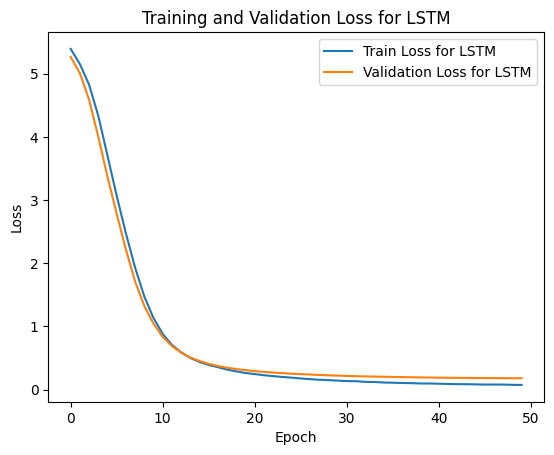

In [102]:
plot_loss(train_losses_lstm, val_losses_lstm, 'LSTM')

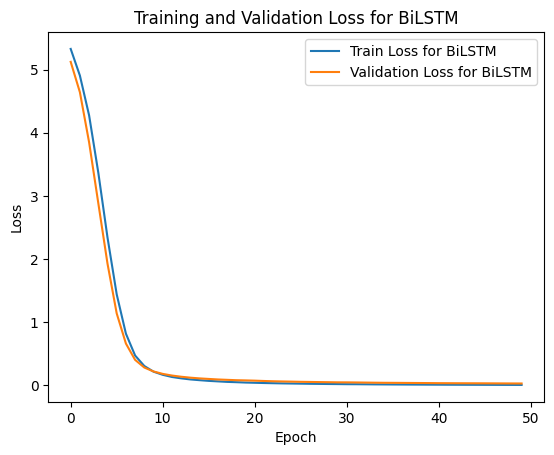

In [103]:
plot_loss(train_losses_bilstm, val_losses_bilstm, 'BiLSTM')

5. On va maintenant utiliser nos modèles entrainés pour générer la suite de trois diﬀérentes phrases (pour chaque modèle) qu'on va initier avec seulement deux ou trois mots.

Pour ce faire nous allons maintenant définir une fonction de génération de texte qui va prendre en paramètres nos débuts de phrases et la longueur des phrases qu'on souhaite avoir puis va nous générer la suite par rapport aux mots inités.

In [104]:
def generate_text(model, start_text, length=50, sequence_length=10):

    model.eval()
    generated_texts = []

    for start in start_text:
        text = start.split()
        hidden = None

        with torch.no_grad():
            for _ in range(length):
                input_tensor = torch.tensor([[word_to_index.get(word, word_to_index["<unk>"]) for word in text[-sequence_length:]]])
                output, hidden = model(input_tensor, hidden)

                predicted_index = torch.argmax(output[0, -1, :]).item()
                predicted_word = index_to_word[predicted_index]
                text.append(predicted_word)

        # Ajouter le texte généré à la liste
        generated_texts.append(" ".join(text))

    return generated_texts

Nous allons maintenant appeler cette fonction de génération sur le modèle lstm puis sur le modèle bilstm en donnant à chaque fois nos trois debuts de phrases pour effectuer la génération.

In [105]:
generated_text_lstm = generate_text(model_lstm, ["Le pouvoir", "L'afrique est", "Depuis toujours"], length=50)
generated_text_lstm

['Le pouvoir Et à force, on nous apprend à cultiver de la haine Alors égalisons le monde à la façon Robin des Bois Je volerai des mots aux esclaves pour les transmettre aux rois Mais en attendant, je me bats contre le monde pour ce complexe Qu’on veut me faire porter, forcer',
 "L'afrique est bien pourrie Depuis toujours, de l’injustice à répétition Moi, j’ai vu des enfants mourir de malnutrition L’Afrique a besoin de fonds pour gérer le matériel Et se passer des dons, sa dépendance actuelle Quel gâchis d’avoir une terre fertile mais pas d’argent pour acheter les graines Et à force, on",
 'Depuis toujours ce changement dans ce faux discours Qui, avant d’être exécuté, avait déjà fait demi-tour Y’a des personnes qui tendent la main, y’a des pays qui le font aussi Je vais pas rentrer dans les détails, l’histoire est bien pourrie Depuis toujours, de l’injustice à répétition Moi, j’ai vu des enfants']

In [106]:
generated_text_bilstm = generate_text(model_bilstm, ["Le pouvoir", "L'afrique est", "Depuis toujours"], length=50)
generated_text_bilstm

['Le pouvoir Et que l’humain lui-même se déshumanise Face aux ambitions politiques et aux aspects capitalistes J’ai deux, trois mots aux ambitions politiques et aux aspects capitalistes J’ai deux, trois mots aux ambitions politiques et aux aspects capitalistes J’ai deux, trois mots aux ambitions politiques et aux aspects capitalistes J’ai deux, trois',
 "L'afrique est bien pourrie Depuis toujours, de l’injustice à répétition Moi, j’ai vu des enfants mourir de malnutrition L’Afrique a besoin de fonds pour gérer le matériel Et se passer des dons, sa dépendance actuelle Quel gâchis d’avoir une terre fertile mais pas d’argent pour acheter les graines Et à force, on",
 'Depuis toujours ce monde déchiré Qui, obsédé par le pouvoir, en oublie sa dignité J’attends toujours ce changement dans ce faux discours Qui, avant d’être exécuté, avait déjà fait demi-tour Y’a des personnes qui tendent la main, y’a des pays qui le font aussi Je vais pas rentrer dans les détails, l’histoire']

7. Selon nous, les limites de la solution mise en place en terme de qualité des données, des modèles et de l'architecture choisie :
  - **Qualité des données** :
  Le corpus présente des limites comme l'absence de ponctuation et des phrases longues, ce qui peut nuire à la qualité du texte généré. Une meilleure structuration des données aurait amélioré les résultats.
  - **Modèle (LSTM/GRU vs BiLSTM/BiGRU vs Alternatives)** :
  LSTM : Efficace, mais lourd et nécessite de nombreux paramètres.
  GRU : Plus léger que l'LSTM, avec des performances similaires, mais plus rapide.
  BiLSTM/BiGRU : Améliore la compréhension du contexte en traversant la séquence dans les deux sens, mais consomme plus de ressources.
  Alternatives : Des modèles comme Transformers (BERT, GPT) peuvent offrir de meilleures performances, surtout pour des tâches complexes.
  - **Architecture choisie** :
  L'architecture avec 128 neurones et 2 couches est adaptée au corpus actuel, mais pour des données plus complexes, il faudrait peut-être plus de couches et de neurones.
  CrossEntropyLoss est bien adaptée pour la classification multiclasses, mais d'autres fonctions de perte comme CTC Loss pourraient être explorées pour des tâches séquentielles.
  - **Ressources et calcul** :
  Les modèles BiLSTM et BiGRU augmentent les besoins en ressources, ce qui peut ralentir l'entraînement et poser problème avec des jeux de données volumineux. Des architectures plus légères ou des modèles comme les Transformers pourraient être plus efficaces.

8. Une solution alternative à la majeure partie de ces limitations<br>
Une solution alternative pour surmonter la majeure partie de ces limitations des modèles LSTM, GRU, BiLSTM et BiGRU est l'utilisation des Transformers.

  Les modèles Transformers comme BERT ou GPT sont plus efficaces pour traiter des séquences de texte complexes. Contrairement aux RNN (LSTM/GRU), les Transformers utilisent des mécanismes d'attention qui leur permettent de traiter des relations à long terme sans dépendre de la structure séquentielle, ce qui améliore considérablement la vitesse d'entraînement et la qualité des résultats, tout en étant plus performants sur des jeux de données volumineux.

  Les Transformers sont aussi parallélisables, ce qui accélère l'entraînement par rapport aux RNN qui doivent traiter les données de manière séquentielle. Ils peuvent également traiter plus efficacement des contextes longs et capturer des dépendances globales dans les données.

# Partie III : Synthèse de texte à l'aide d'un auto-encoder “RNN”

Nous allons utiliser un **auto-encodeur** pour la synthèse de texte. Plus précisément, nous allons appliquer cet auto-encodeur sur un modèle **BiLSTM**. Pour ce faire, nous commencerons par diviser notre corpus en **données d'entraînement** et **données de test**. Cette approche nous permettra d'exploiter la capacité du modèle à encoder et décoder des séquences de texte de manière plus efficace, tout en améliorant la qualité de la synthèse.

In [107]:
#### Separation de notre corpus
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [108]:
batch_size = 2
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [109]:
class LSTMAutoencoder(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers, bidirectional=True):
        super(LSTMAutoencoder, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)

        # Encoder bidirectionnel
        self.encoder_lstm = nn.LSTM(
            embed_size,
            hidden_size,
            num_layers,
            batch_first=True,
            bidirectional=bidirectional
        )

        # Decoder unidirectionnel
        self.decoder_lstm = nn.LSTM(
            hidden_size * (2 if bidirectional else 1),
            hidden_size,
            num_layers,
            batch_first=True
        )

        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, x):
        embedded = self.embedding(x)
        encoder_out, (h, c) = self.encoder_lstm(embedded)

        if self.encoder_lstm.bidirectional:
            # Réorganisation des états cachés (couches × directions → couches × batch × hidden_size)
            h = h.view(self.encoder_lstm.num_layers, 2, -1, self.encoder_lstm.hidden_size)
            h = h.mean(dim=1)

            c = c.view(self.encoder_lstm.num_layers, 2, -1, self.encoder_lstm.hidden_size)
            c = c.mean(dim=1)

        decoder_out, _ = self.decoder_lstm(encoder_out, (h, c))
        output = self.fc(decoder_out)

        return output.permute(0, 2, 1)

In [116]:
embed_size = 256
hidden_size = 256
num_layers = 2
num_epochs = 50
learning_rate = 0.002
bidirectional = True

In [117]:
model = LSTMAutoencoder(vocab_size, embed_size, hidden_size, num_layers, bidirectional)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [112]:
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for X, y in train_loader:
        optimizer.zero_grad()
        output = model(X)

        loss = criterion(output, y)

        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {total_loss / len(train_loader):.4f}")

Epoch [1/50], Train Loss: 4.6455
Epoch [2/50], Train Loss: 2.5976
Epoch [3/50], Train Loss: 1.0993
Epoch [4/50], Train Loss: 0.4649
Epoch [5/50], Train Loss: 0.2210
Epoch [6/50], Train Loss: 0.0700
Epoch [7/50], Train Loss: 0.0318
Epoch [8/50], Train Loss: 0.0198
Epoch [9/50], Train Loss: 0.0132
Epoch [10/50], Train Loss: 0.0097
Epoch [11/50], Train Loss: 0.0076
Epoch [12/50], Train Loss: 0.0062
Epoch [13/50], Train Loss: 0.0051
Epoch [14/50], Train Loss: 0.0043
Epoch [15/50], Train Loss: 0.0036
Epoch [16/50], Train Loss: 0.0031
Epoch [17/50], Train Loss: 0.0027
Epoch [18/50], Train Loss: 0.0023
Epoch [19/50], Train Loss: 0.0021
Epoch [20/50], Train Loss: 0.0018
Epoch [21/50], Train Loss: 0.0016
Epoch [22/50], Train Loss: 0.0014
Epoch [23/50], Train Loss: 0.0013
Epoch [24/50], Train Loss: 0.0011
Epoch [25/50], Train Loss: 0.0010
Epoch [26/50], Train Loss: 0.0009
Epoch [27/50], Train Loss: 0.0008
Epoch [28/50], Train Loss: 0.0007
Epoch [29/50], Train Loss: 0.0007
Epoch [30/50], Train Lo

In [118]:
model.eval()
test_loss = 0
with torch.no_grad():
    for X, y in test_loader:
        output = model(X)
        loss = criterion(output, y)
        test_loss += loss.item()

print(f"\nTest Loss: {test_loss / len(test_loader):.4f}")


Test Loss: 5.4788


In [114]:
def summarize_corpus(model, corpus_text):
    """ Résume l'ensemble du corpus en une seule fois """
    model.eval()
    with torch.no_grad():
        indexed_corpus = [word_to_index.get(word, word_to_index["<unk>"]) for word in corpus_text.split()]
        input_tensor = torch.tensor(indexed_corpus).unsqueeze(0)  # Ajouter batch dimension
        output_tensor = model(input_tensor)
        output_indices = torch.argmax(output_tensor, dim=1).squeeze().tolist()
        summarized_corpus = " ".join(index_to_word[idx] for idx in output_indices)
        return summarized_corpus

# Reconstruction du texte global à partir de test_loader
test_corpus = []
for test_X, _ in test_loader:
    for i in range(test_X.size(0)):
        sentence = " ".join(index_to_word[idx.item()] for idx in test_X[i])
        test_corpus.append(sentence)

global_test_text = " ".join(test_corpus)

global_summary = summarize_corpus(model, global_test_text)

print("=" * 80)
print("\033[1m📜 TEXTE ORIGINAL (Données de test) 📜\033[0m")
print("=" * 80)
print("\n".join(test_corpus[:10]))
print("...\n")
print("=" * 80)
print("\033[1m✍️  RÉSUMÉ GÉNÉRÉ  ✍️\033[0m")
print("=" * 80)
print(global_summary)
print("=" * 80)

📜 TEXTE ORIGINAL (Données de test) 📜
déchiré Qui, obsédé par le pouvoir, en oublie sa dignité J’attends toujours ce changement dans
fonds pour gérer le matériel Et se passer des dons, sa dépendance actuelle Quel gâchis
apprenne à accepter nos différences Qu’une couleur, une croyance n’est pas une référence Qu’on réalise
je devrais avoir honte de mes origines, enfant africain, ça fait de la peine De
façon Robin des Bois Je volerai des mots aux esclaves pour les transmettre aux rois
toujours, de l’injustice à répétition Moi, j’ai vu des enfants mourir de malnutrition L’Afrique a
qu’il y a des choses plus importantes que le pouvoir Et qu’on n’a même pas
vexent si c’est pour parler de ces concepts Et que l’humain lui-même se déshumanise Face
volerai des mots aux esclaves pour les transmettre aux rois Mais en attendant, je me
Y’a des personnes qui tendent la main, y’a des pays qui le font aussi Je
...

✍️  RÉSUMÉ GÉNÉRÉ  ✍️
obsédé obsédé par le pouvoir, en oublie sa dignité J’attends toujou

**A travers la mise en place de ce modèle Bilstm avec un auto encoders on constate que par la suite le modèle arrive à faire un résumé assez proche du texte original. Toutefois, on peut toujours l'améliorer. Mais du côté de l'entraînement on voit qu'on beaucoup plus de performances que les modèles précedents.**

Source : https://www.kdnuggets.com/2020/07/pytorch-lstm-text-generation-tutorial.html , Google pour les recherches et les supports du cours.